# "The Dutch Energy Landscape: Prices, Renewables, and Residential Consumption"

**Project Group 22**  

<br>

<div style="float: left; margin-right: 20px;">
    
| Members               | Student Numbers |
|-----------------------|-----------------|
| Leander Barendse      | 4965051         |
| Bram Hendriksz        | 6092543         |
| Naut Smeets           | 5143632         |
| Maaike van Schaick    | 5178401         |
| Adriaan Zoetmulder    | 6079946         |

</div>



GitHub: https://github.com/adriaanzoetmulder/TIL6010-LabAssignments/tree/main

# 1. Research Objective

*Research objtective Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*  

**Research Objective:** How do variations in energy (electricity, and gas) prices and the use of renewable energy sources influence energy and gas consumption patterns in residential buildings across different municipalities in the Netherlands over time?

# 2. Data Sources
*Provide the data source you need for answering the RQ, provide link to the data where
applicable*

<br>

**Data Sources:**

- This databank provides comprehensive information regarding energy and electricity usage within the Netherlands, including total usage of electricity and gas, use of renewable energy sources: https://klimaatmonitor.databank.nl/Jive/   


- Gas and electricity prices: 
    - https://www.clo.nl/indicatoren/nl055409-energieprijzen-en-wereldolieprijs-#:~:text=De%20consumentenprijsindex%20(CPI)%20energie%20geeft,van%201%2C8%20procent%20ligt.
    - https://www.cbs.nl/nl-nl/cijfers/detail/84672NED

# 3. Additional Information

*Provide information about the time scale and spatial scale you are looking at. Provide the
geographical boundary of your study*  

<br>

**Time Scale:**  2007 - 2022, A timespan of 18 years seems a broad enough timespan. Also this timeframe is represented in all the needed datasets.

**Spatial Scale:**  
- Focus on residential buildings within the selected municipalities in the Netherlands.
**Geographical Boundary:** 
- The municipalities in Netherlands considering various factors like population density, geographical location.

# Introduction

to be written

# Coding total of the energy consumption

In [1]:
#library imports
import pandas as pd
import numpy as np
import plotly.express as px
import json
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
verbruik_nl = pd.read_excel('Totaal_Nederland.xlsx', skiprows=1)   # loading the gas usage, electricity usage via open net and the electricity usage including solar energy of the Netherlands in total
verbruik_nl.set_index('Totaal  - Nederland', inplace=True)  # setting the index
verbruik_nl.dropna(how='any', inplace=True)  # droppping the NaN values of the dataframe
# display(verbruik_nl)
# verbruik_nl.plot()

In [3]:
verbruik_ge = pd.read_excel('Totaal_Gemeenten.xlsx', skiprows=2)   # loading the gas usage, electricity usage via open net and the electricity usage including solar energy of every municipality the Netherlands
verbruik_ge.set_index('Totaal  - Gemeenten', inplace=True)  # setting the index
# verbruik_ge = verbruik_ge[verbruik_ge['Totaal  - Gemeenten'] != 'Maashorst'
to_remove_gem = ['Maashorst', 
                       'Dijk en Waard'
                     ]
verbruik_ge = verbruik_ge.drop(to_remove_gem, axis=0)    # removed the two municipalities that are too new to be relevant
# display(verbruik_ge)

# verbruik_ge.plot(kind='line')

In [4]:
aardgas_2007_2016 = pd.read_excel('aardgas_2007-2016.xlsx', skiprows=2)   # loading the price of gas over time 
aardgas_2007_2016.set_index('Aardgas; gemiddelde prijzen eindverbruikers, 2007-2016', inplace=True)  #setting the index
aardgas_2007_2016.dropna(how='all', inplace=True)   # droppping the NaN values of the rows of the dataframe
aardgas_2007_2016.dropna(axis=1, how='all', inplace=True)   # droppping the NaN values of the colums of the dataframe
aardgas_2007_2016 = aardgas_2007_2016 / 31.6    # switching units from GJ to m3
aardgas_2007_2016.rename(columns={'Verbruiksklasse in euro per GJ (huishoudens)': 'Verbruiksklasse in euro per m3 (huishoudens)'}, inplace=True)   # renaming colums because of switching units
# display(aardgas_2007_2016)

In [5]:
aardgas_2007_2016['Group'] = np.arange(len(aardgas_2007_2016)) // 4  # Creating a grouping key to use the value of a year in stead of every quarter of the year
aardgas_2007_2016_mean = aardgas_2007_2016.groupby('Group')['Verbruiksklasse in euro per m3 (huishoudens)'].mean().reset_index(drop=True)   # setting the index
# display(aardgas_2007_2016_mean)

index = ['2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']
aardgas = []
for i in range(len(aardgas_2007_2016_mean)):
    aardgas.append(aardgas_2007_2016_mean[i])
# print(aardgas)
for i in range(len(aardgas_2007_2016_mean)):
    new_data_aardgas = pd.DataFrame(aardgas, index, columns = ['Verbruiksklasse in euro per m3 (huishoudens)'])   # implementing the new dataframe using the mean values of the quarters for the certain year
# display(new_data_aardgas)

In [6]:
elektriciteit_2007_2016 = pd.read_excel('elektriciteit_2007-2016.xlsx', skiprows=2)   # loading the price of electricity over time 
elektriciteit_2007_2016.set_index('Elektriciteit; gemiddelde prijzen eindverbruikers, 2007-2016', inplace=True)    #setting the index
elektriciteit_2007_2016.dropna(how='all', inplace=True)   # droppping the NaN values of the rows of the dataframe
elektriciteit_2007_2016.dropna(axis=1, how='all', inplace=True)   # droppping the NaN values of the colums of the dataframe

#   no need to switch units in this dataframe

# display(elektriciteit_2007_2016)

In [7]:
elektriciteit_2007_2016['Group'] = np.arange(len(elektriciteit_2007_2016)) // 4  # Creating a grouping key to use the value of a year in stead of every quarter of the year
elektriciteit_2007_2016_mean = elektriciteit_2007_2016.groupby('Group')['Verbruiksklasse in euro per kWh (huishoudens)'].mean().reset_index(drop=True)  # setting the index
# display(elektriciteit_2007_2016_mean)

index = ['2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']
elektriciteit = []
for i in range(len(elektriciteit_2007_2016_mean)):
    elektriciteit.append(elektriciteit_2007_2016_mean[i])
# print(elektriciteit)
for i in range(len(elektriciteit_2007_2016_mean)):
    new_data_elektriciteit = pd.DataFrame(elektriciteit, index, columns = ['Verbruiksklasse in euro per kWh (huishoudens)'])   # implementing the new dataframe using the mean values of the quarters for the certain year
# display(new_data_elektriciteit)

In [8]:
aardgas_en_elektriciteit_2018_heden = pd.read_excel('aardgas_en_elektriciteit_2018_heden.xlsx', skiprows=3)  # loading the price of gas and electricity over from 2018 untill 2022
aardgas_en_elektriciteit_2018_heden.set_index('Perioden', inplace=True) #setting the index
aardgas_en_elektriciteit_2018_heden.dropna(how='all', inplace=True)   # droppping the NaN values of the rows of the dataframe
aardgas_en_elektriciteit_2018_heden.drop('Aardgas inclusief btw in euro/m3', axis=1, inplace=True)    # to drop the values of gas including btw
aardgas_en_elektriciteit_2018_heden.drop('Elektriciteit inclusief btw in euro/kWh', axis=1, inplace=True)    # to drop the values of electricity including btw

# display(aardgas_en_elektriciteit_2018_heden)

In [9]:
aardgas_en_elektriciteit_2018_heden['Group'] = np.arange(len(aardgas_en_elektriciteit_2018_heden)) // 4  # Creating a grouping key to use the value of a year in stead of every quarter of the year
aardgas_en_elektriciteit_2018_heden_mean = aardgas_en_elektriciteit_2018_heden.groupby('Group')['Aardgas exclusief btw in euro/m3', 'Elektriciteit exclusief btw in euro/kWh'].mean().reset_index(drop=True)  # setting the index
# display(aardgas_en_elektriciteit_2018_heden_mean)

index = ['2018', '2019','2020', '2021', '2022']
aardgas_en_elektriciteit = np.zeros((5, 2))

# print(aardgas_en_elektriciteit)
for i in range(len(aardgas_en_elektriciteit_2018_heden_mean)):
    for j in range(0, 2):
        aardgas_en_elektriciteit[i][j] = aardgas_en_elektriciteit_2018_heden_mean.iloc[i, j]
# display(aardgas_en_elektriciteit)
for i in range(len(aardgas_en_elektriciteit_2018_heden_mean)):
    new_data_aardgas_en_elektriciteit_2018_heden = pd.DataFrame(aardgas_en_elektriciteit, index, columns = ['Verbruiksklasse in euro per m3 (huishoudens)','Verbruiksklasse in euro per kWh (huishoudens)']) 
    # implementing the new dataframe using the mean values of the quarters for the certain year
# display(new_data_aardgas_en_elektriciteit_2018_heden)

<ipython-input-9-ab71749f7d07>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aardgas_en_elektriciteit_2018_heden_mean = aardgas_en_elektriciteit_2018_heden.groupby('Group')['Aardgas exclusief btw in euro/m3', 'Elektriciteit exclusief btw in euro/kWh'].mean().reset_index(drop=True)  # setting the index


In [10]:
result = pd.concat([new_data_aardgas, new_data_elektriciteit], axis=1)   #combining the prices of gas and electricity in one dataframe of 2007-2016
# display(result)

In [11]:
endresult = pd.concat([result, new_data_aardgas_en_elektriciteit_2018_heden])  #combining the prices of gas and electricity in one dataframe of 2007-2022
# display(endresult)

# Coding of renewable energy

In [12]:
## Load datasets

# The original datasets are using a semicolon (;) instead of a comma (,) as a delimiter. 
# To load the CSV file correctly, the delimiter is specified in the 'pd.read_csv()' function.

rnew_elec = pd.read_excel('totaalhernieuwbareelek.xlsx', skiprows=1)
rnew_heat = pd.read_excel('totaalhernieuwbarewarmte.xlsx', skiprows=1)


rnew_elec.set_index('Totaal bekende hernieuwbare elektriciteit - Gemeenten', inplace=True)
rnew_heat.set_index('Totaal bekende hernieuwbare warmte - Gemeenten', inplace=True) 
# to_remove_gem = ['Maashorst', 
#                        'Dijk en Waard'
#                      ]
# rnew_elec = rnew_elec.drop(to_remove_gem, axis=0)
# rnew_heat = rnew_heat.drop(to_remove_gem, axis=0)

# display(rnew_elec)
## Format datasets

# The original datasets specify the columns using data information and year: 
# 'Totaal bekende hernieuwbare elektriciteit|2010'. In order to have a clear and readable dataset,
# these names are changed to only the year using the .split() method to split the name at the '|' character.

# Extract the year from the column names for rnew_elec
new_columns_elec = [col.split('|')[-1] for col in rnew_elec.columns]

# Extract the year from the column names for rnew_heat
new_columns_heat = [col.split('|')[-1] for col in rnew_heat.columns]

# Assign the new column names to the Data Sets
rnew_elec.columns = new_columns_elec
rnew_heat.columns = new_columns_heat

rnew_elec_filtered = rnew_elec
rnew_heat_filtered = rnew_heat
# display(rnew_heat_filtered)

In [13]:
cbs_georef_2023 = gpd.read_file("bestuurlijkegrenzen.gpkg")

## Format data

# Filter the data so we only have the columns of the 'gem_name' and 'geometry'
cbs_georef_2023_filtered = cbs_georef_2023[['gemeentenaam', 'geometry']]

# Change the name of the 'gem_name' column to 'Gemeenten' in order to be consistent across datasets
cbs_georef_2023_filtered = cbs_georef_2023_filtered.rename(columns={'gemeentenaam': 'Gemeenten'})
# cbs_georef_2023_filtered


# Since one datasets consists of 342 lines and the other of 352 we have to compare these two sets.
# This is done by creating a new dataset where the 'Gemeenten' value is not found in the 'Gemeenten' column of the 'rnew_elec' dataframe. 
# In other words, it finds the 'Gemeenten' values that are present in the GeoPackage file ('cbs_georef_2023_filtered') 
# but not in the CSV files ('rnew_heat_filtered', rnew_elec_filtered). And vice versa.

# missing_in_rnew_elec = cbs_georef_2023_filtered.loc[~cbs_georef_2023_filtered['Gemeenten'].isin(rnew_elec_filtered['Gemeenten'])]
# print(missing_in_rnew_elec['Gemeenten'])

# missing_in_cbs_georef_2023_filtered = rnew_elec_filtered.loc[~rnew_elec_filtered['Gemeenten'].isin(cbs_georef_2023_filtered['Gemeenten'])]
# print(missing_in_cbs_georef_2023_filtered['Gemeenten'])

In [14]:
# Setting 'Gemeenten' as index for all datasets : 'rnew_elec_filtered', 'rnew_heat_filtered', 'cbs_georef_2023_filtered'
# This is done to rename and drop certain rows based on municipality names.

cbs_georef_2023_filtered.set_index('Gemeenten', inplace=True)
# display(cbs_georef_2023_filtered)

rnew_elec_filtered = rnew_elec_filtered.rename(columns={'Totaal bekende hernieuwbare elektriciteit - Gemeenten': 'Gemeenten'})
rnew_elec_filtered.index.name = 'Gemeenten'

rnew_heat_filtered = rnew_heat_filtered.rename(columns={'Totaal bekende hernieuwbare warmte - Gemeenten': 'Gemeenten'})
rnew_heat_filtered.index.name = 'Gemeenten'
# display(rnew_elec_filtered)
# display(rnew_heat_filtered)

# rnew_elec_filtered.set_index('Gemeenten', inplace=True)
# rnew_heat_filtered.set_index('Gemeenten', inplace=True)

In [15]:
# rnew_elec_filtered.set_index('Gemeenten', inplace=True)
# rnew_heat_filtered.set_index('Gemeenten', inplace=True)

In [16]:
# After comparing the two datasets, it can be concluded that some names overlap and some are former municipalities. 
# Therefore the overlapping names are changed and the former municipalities are removed from the Geopackage file.
# Furthermore, some very new municipalities are not included in both datasets. Since these municipalities are part of other
# in the datasets they will be removed for now to be consistent. 

# Renaming overlapping names
cbs_georef_renamed = cbs_georef_2023_filtered.rename(index={'Cuijk': 'Land van Cuijk', 
                                                            'Bergen (L)' : 'Bergen (L.)', 
                                                            'Bergen (NH)' : 'Bergen (NH.)', 
                                                            "'s-Gravenhage" : 'Den Haag', 
                                                            'Westvoorne' : 'Voorne aan Zee', 
                                                            'Hengelo (O)': 'Hengelo'}
                                                            )

# Drop former and very new municipalities

# List of former municipalities that will be removed from the geopackage dataset
to_remove_cbs_georef = ['Heerhugowaard', 
             'Mill en Sint Hubert', 
             'Beemster', 
             'Weesp', 
             'Brielle', 
             'Boxmeer', 
             'Sint Anthonis', 
             'Langedijk', 
             'Landerd', 
             'Uden', 
             'Hellevoetsluis', 
             'Grave'
            ]

# List of very new municipalities that will be removed from the renewable energy source datasets
to_remove_rnew_elec = ['Maashorst', 
                       'Dijk en Waard'
                     ]

to_remove_rnew_heat = ['Maashorst', 
                       'Dijk en Waard'
                     ]

# Removing the rows
cbs_georef_final = cbs_georef_renamed.drop(to_remove_cbs_georef, axis=0)
rnew_elec_final = rnew_elec_filtered.drop(to_remove_rnew_elec, axis=0)
rnew_heat_final = rnew_heat_filtered.drop(to_remove_rnew_elec, axis=0)

# Order the sets in alphabetical order
cbs_georef_final = cbs_georef_final.sort_index()
rnew_elec_final = rnew_elec_final.sort_index()
rnew_heat_final = rnew_heat_final.sort_index()

# Show final datasets
# display(rnew_elec_final)
# display(cbs_georef_final)
# display(rnew_heat_final)

In [17]:
# Merge datasets
merged_georef_rnew_elec = rnew_elec_final.merge(cbs_georef_final, on='Gemeenten', how='left')
merged_georef_rnew_heat = rnew_heat_final.merge(cbs_georef_final, on='Gemeenten', how='left')
# display(merged_georef_rnew_heat)
# display(verbruik_ge)

merged_georef_verbruik_ge_elec = pd.concat([verbruik_ge, cbs_georef_final], axis=1) #  adding the geometry of the municipalities for the total energy use
# display(merged_georef_verbruik_ge_elec)


# display(merged_georef_rnew_elec)
# display(merged_georef_rnew_heat)

In [18]:
# Setting up the requirements for the Heatmap

# Setting up the boundaries of the Netherlands
netherlands_boundary = gpd.read_file('NLD_adm0.shp')
    
# Converting the CSV files to a GeoDataFrames
merged_georef_rnew_heat_gdf = gpd.GeoDataFrame(merged_georef_rnew_heat, geometry='geometry')
merged_georef_rnew_elec_gdf = gpd.GeoDataFrame(merged_georef_rnew_elec, geometry='geometry')
merged_georef_verbruik_ge_gdf = gpd.GeoDataFrame(verbruik_ge, geometry=merged_georef_verbruik_ge_elec.geometry)

# plotting

<AxesSubplot:xlabel='Totaal  - Nederland'>

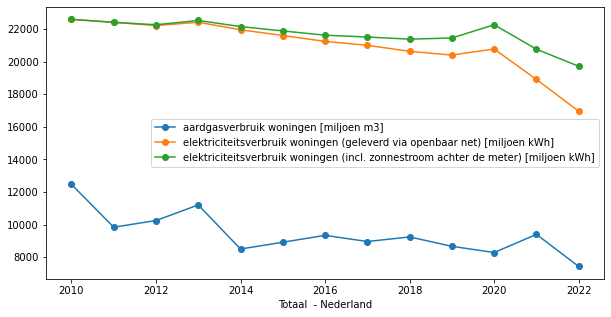

In [19]:
verbruik_nl.plot(figsize=(10, 5), marker='o', linestyle='-')  # plotting the dataset to see the differences in the use of different energy sources over time

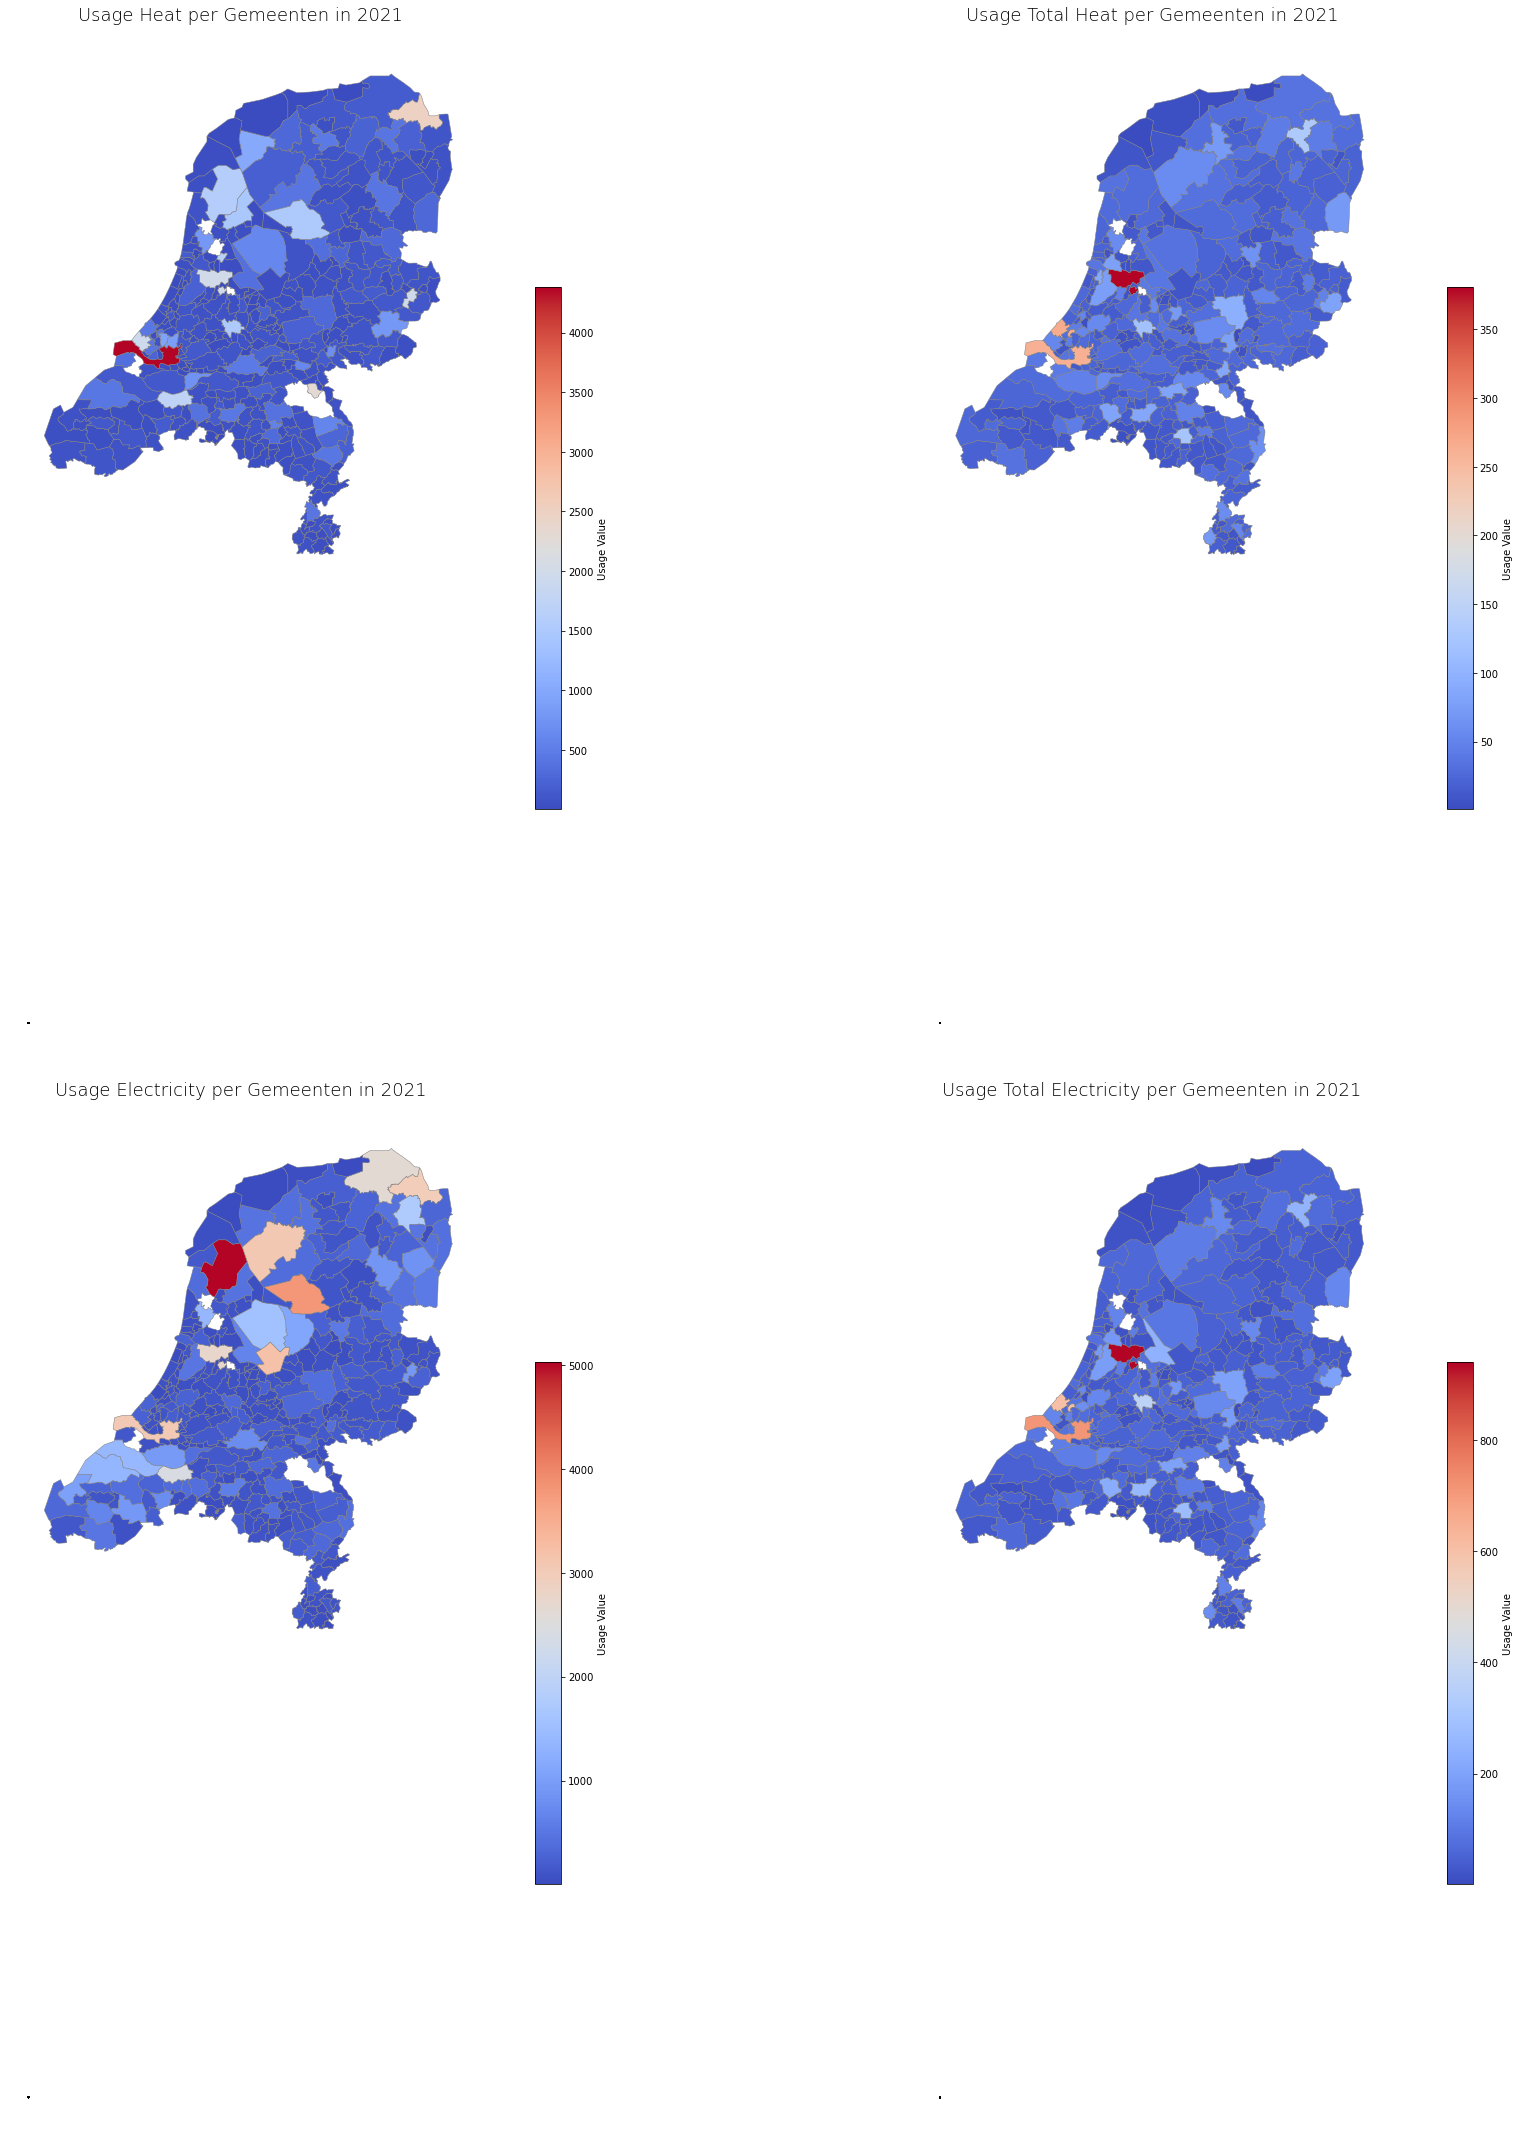

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(30, 30))  # Create a 2x2 grid of subplots

# Constructing the figure for heat usage per municipality

# Plot the boundaries of Netherlands for context
netherlands_boundary.boundary.plot(ax=axs[0,0], linewidth=1.5, color="black")

# Plot the gemeenten choropleth map using the Heat usage data in '2021' column for coloring
merged_georef_rnew_heat_gdf.plot(column='2021', 
         cmap='coolwarm', 
         linewidth=0.5, 
         ax=axs[0,0], 
         edgecolor='0.5', 
         legend=True, 
         legend_kwds={'shrink': 0.5, 
                      'label': "Usage Value"
                      }
         )

# Adjusting title and other visual aspects
axs[0,0].set_title("Usage Heat per Gemeenten in 2021", fontdict={'fontsize': '18', 'fontweight' : '3'})
axs[0,0].axis('off')


# Constructing the figure for electricity usage per municipality

# Plot the boundaries of Netherlands for context
netherlands_boundary.boundary.plot(ax=axs[1,0], linewidth=1.5, color="black")

# Plot the gemeenten choropleth map using the Electricity usage data in '2021' column for coloring
merged_georef_rnew_elec_gdf.plot(column='2021', 
         cmap='coolwarm', 
         linewidth=0.5, 
         ax=axs[1,0], 
         edgecolor='0.5', 
         legend=True, 
         legend_kwds={'shrink': 0.5, 
                      'label': "Usage Value"
                      }
         )

# Adjusting title and other visual aspects
axs[1,0].set_title("Usage Electricity per Gemeenten in 2021", fontdict={'fontsize': '18', 'fontweight' : '3'})
axs[1,0].axis('off')


# Constructing the figure for total heat usage per municipality

# Plot the boundaries of Netherlands for context
netherlands_boundary.boundary.plot(ax=axs[0,1], linewidth=1.5, color="black")

# Plot the gemeenten choropleth map using the total gas usage data in '2021' column for coloring
merged_georef_verbruik_ge_gdf.plot(column='aardgasverbruik woningen [miljoen m3] in 2021', 
         cmap='coolwarm', 
         linewidth=0.5, 
         ax=axs[0,1], 
         edgecolor='0.5', 
         legend=True, 
         legend_kwds={'shrink': 0.5, 
                      'label': "Usage Value"
                      }
         )

# Adjusting title and other visual aspects
axs[0,1].set_title("Usage Total Heat per Gemeenten in 2021", fontdict={'fontsize': '18', 'fontweight' : '3'})
axs[0,1].axis('off')

# Constructing the figure for total electricity usage per municipality

netherlands_boundary.boundary.plot(ax=axs[1,1], linewidth=1.5, color="black")

# Plot the gemeenten choropleth map using the total gas usage data in '2021' column for coloring
merged_georef_verbruik_ge_gdf.plot(column='elektriciteitsverbruik woningen (incl. zonnestroom achter de meter) [miljoen kWh] in 2021', 
         cmap='coolwarm', 
         linewidth=0.5, 
         ax=axs[1,1], 
         edgecolor='0.5', 
         legend=True, 
         legend_kwds={'shrink': 0.5, 
                      'label': "Usage Value"
                      }
         )

# Adjusting title and other visual aspects
axs[1,1].set_title("Usage Total Electricity per Gemeenten in 2021", fontdict={'fontsize': '18', 'fontweight' : '3'})
axs[1,1].axis('off')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Totaal hernieuwbaar energieverbruik

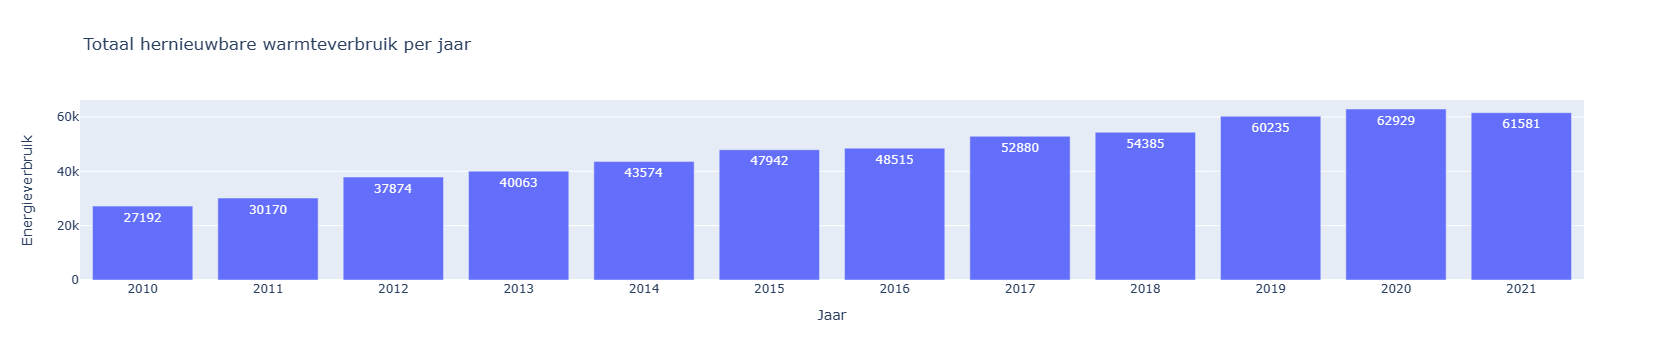

In [21]:
df = pd.read_csv('totaalhernieuwbare_warmte_gemeenten.csv', delimiter=';', encoding='utf-8')

# Verwijder de tekst uit de kolomnamen en behoud alleen de jaartallen
df.columns = df.columns.str.extract('(\d+)', expand=False)

# Selecteer alleen de kolommen van 2010 tot en met 2021
selected_columns = df.columns[1:]  # Selecteer alle kolommen vanaf de tweede kolom (index 1)

# Maak een lege lijst om het resultaat op te slaan
result_list = []# Itereer over de kolommen (jaren) en bereken het totale energieverbruik per jaar
for year in selected_columns:
    year_total = df[year].sum()
    result_list.append({'Jaar': int(year), 'Totaal_Energieverbruik': year_total})

# Maak een DataFrame van de lijst
df_result_warmte = pd.DataFrame(result_list)

# Maak een interactieve staafgrafiek met Plotly Express
fig = px.bar(df_result_warmte, x='Jaar', y='Totaal_Energieverbruik', text='Totaal_Energieverbruik',
             labels={'Totaal_Energieverbruik': 'Energieverbruik'},
             title='Totaal hernieuwbare warmteverbruik per jaar',
             hover_data={'Totaal_Energieverbruik': ':.2f'})

(fig.update_layout(xaxis=dict(type='category')))

# Voeg een opmaak toe aan de hoverinformatie
fig.update_traces(hovertemplate='%{text:.2f} units')

# Toon de grafiek
fig.show()

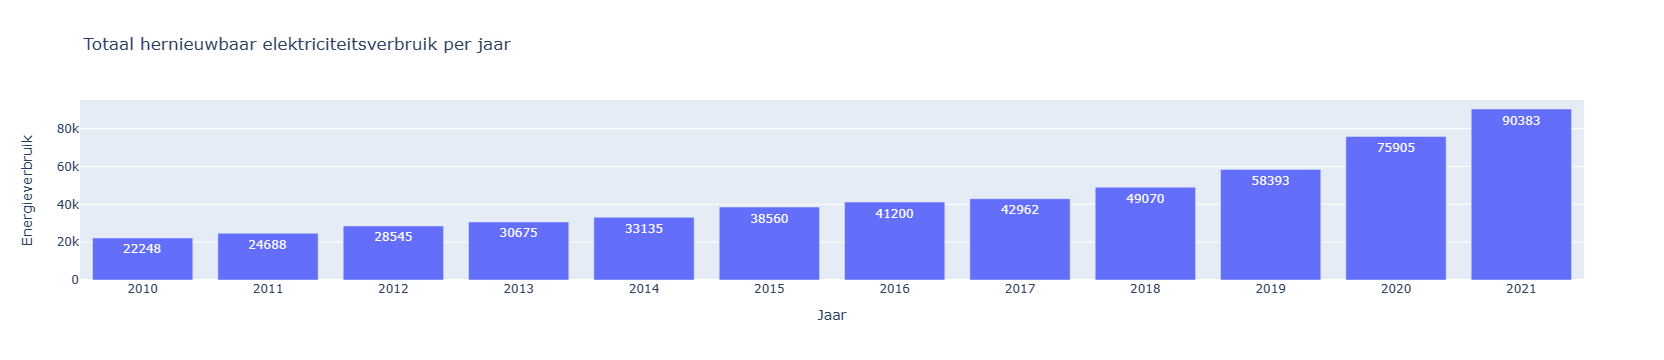

    Jaar  Totaal_Energieverbruik_x  Totaal_Energieverbruik_y
0   2010                     27192                     22248
1   2011                     30170                     24688
2   2012                     37874                     28545
3   2013                     40063                     30675
4   2014                     43574                     33135
5   2015                     47942                     38560
6   2016                     48515                     41200
7   2017                     52880                     42962
8   2018                     54385                     49070
9   2019                     60235                     58393
10  2020                     62929                     75905
11  2021                     61581                     90383


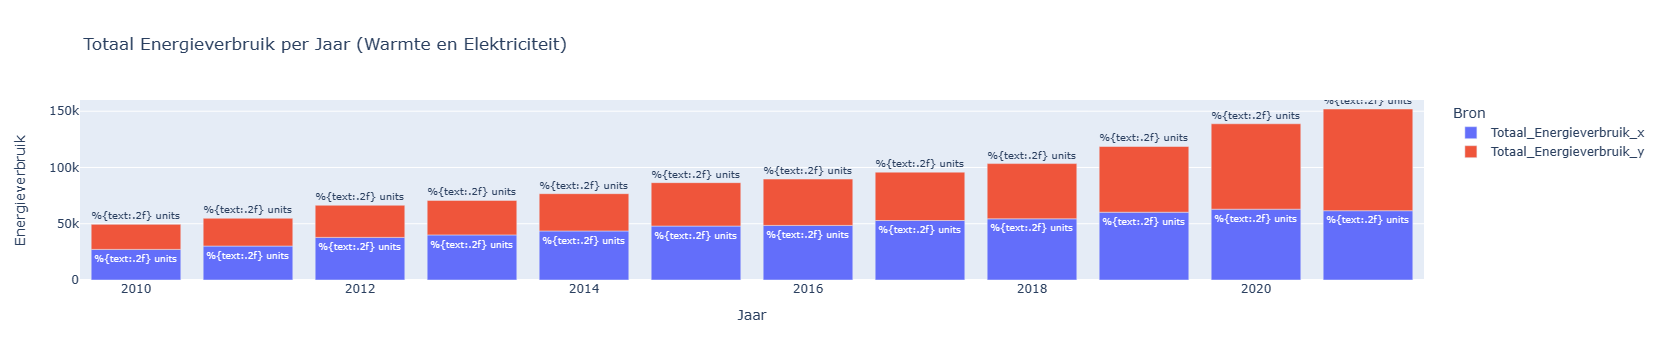

In [22]:
df = pd.read_csv('totaalhernieuwbare_elektriciteit_gemeenten.csv', delimiter=';', encoding='utf-8')

# Verwijder de tekst uit de kolomnamen en behoud alleen de jaartallen
df.columns = df.columns.str.extract('(\d+)', expand=False)

# Selecteer alleen de kolommen van 2010 tot en met 2021
selected_columns = df.columns[1:]  # Selecteer alle kolommen vanaf de tweede kolom (index 1)

# Maak een lege lijst om het resultaat op te slaan
result_list = []# Itereer over de kolommen (jaren) en bereken het totale energieverbruik per jaar
for year in selected_columns:
    year_total = df[year].sum()
    result_list.append({'Jaar': int(year), 'Totaal_Energieverbruik': year_total})

# Maak een DataFrame van de lijst
df_result_elektriciteit = pd.DataFrame(result_list)

# Maak een interactieve staafgrafiek met Plotly Express
fig = px.bar(df_result_elektriciteit, x='Jaar', y='Totaal_Energieverbruik', text='Totaal_Energieverbruik',
             labels={'Totaal_Energieverbruik': 'Energieverbruik'},
             title='Totaal hernieuwbaar elektriciteitsverbruik per jaar',
             hover_data={'Totaal_Energieverbruik': ':.2f'})

(fig.update_layout(xaxis=dict(type='category')))

# Voeg een opmaak toe aan de hoverinformatie
fig.update_traces(hovertemplate='%{text:.2f} units')

# Toon de grafiek
fig.show()




# Combineer de twee DataFrames op basis van het jaartal
df_combined = pd.merge(df_result_warmte, df_result_elektriciteit, on='Jaar')
print(df_combined)

# Maak een interactieve staafgrafiek met Plotly Express
fig = px.bar(df_combined, x='Jaar', y=['Totaal_Energieverbruik_x', 'Totaal_Energieverbruik_y'],
             labels={'value': 'Energieverbruik', 'variable': 'Bron'},
             title='Totaal Energieverbruik per Jaar (Warmte en Elektriciteit)',
             hover_data={'value': ':.2f'})

# Voeg een opmaak toe aan de hoverinformatie
fig.update_traces(texttemplate='%{text:.2f} units', textposition='outside')

# Toon de grafiek
fig.show()

# Discussion

results to be discussed

# Conclusion

conclusion